<style>
    @media print{
        body {
            position:relative !important;
        }
        .celltag_new_page {
            page-break-before: always !important;
        }
    }
</style>
# COMPSCI 371D Homework 3
- Khoo Qi Xuan
- Jake Heller
- Chavez Cheong

### Problem 0 (3 points)

## Part 1: Nearest Neighbors 

### Problem 1.1 (Exam Style)

$$h(x) = \begin{cases}0, x\in[3,4] \\ 1, x\notin[3,4] \end{cases} \forall x\in\mathbb{R}$$

### Problem 1.2 (Exam Style)
$$h(x) = \begin{cases}1, x<2 \\ 3, 2\leq x < 3.5 \\ 5,  3.5 \leq x < 5.5 \\7, x \geq 5.5  \end{cases} \forall x\in\mathbb{R}$$

## Part 2: Gradient Descent Basics

### Problem 2.1 (Exam Style)

$$\nabla m = \begin{bmatrix} \frac{x}{\sqrt{x^2+y^2}} \\ \frac{y}{\sqrt{x^2+y^2}}  \end{bmatrix}$$
$$H_m = \begin{bmatrix} \frac{y^2}{(x^2+y^2)^{3/2}} & -\frac{xy}{(x^2+y^2)^{3/2}}  \\ -\frac{xy}{(x^2+y^2)^{3/2}} &  \frac{x^2}{(x^2+y^2)^{3/2}} \end{bmatrix}$$

When $x = 3$, $y = 4$:
$$\nabla m \left(\begin{bmatrix}3 \\ 4\end{bmatrix}\right) = \begin{bmatrix} 0.6 \\ 0.8  \end{bmatrix}$$
$$H_m \left(\begin{bmatrix}3 \\ 4\end{bmatrix}\right)= \begin{bmatrix} 0.128 & -0.096  \\ -0.096 &  0.072 \end{bmatrix}$$

### Problem 2.2 (Exam Style)
$$\nabla f(\mathbf{u}) = \begin{bmatrix} \frac{3}{8}u +\frac{1}{8}v - \frac{1}{4} \\ \frac{3}{8}v +\frac{1}{8}u + \frac{1}{4} \end{bmatrix}$$

When $\mathbf{u} = \begin{bmatrix}0 \\ 2\end{bmatrix}$:

$$\nabla f(\mathbf{u}) = \begin{bmatrix}0 \\ 1\end{bmatrix}$$

To find $h(\alpha)$:

$$h(\alpha) = f(\mathbf{u}_0 - \alpha\nabla f(\mathbf{u}_0)) = f\left(\begin{bmatrix}0 \\ 2-\alpha\end{bmatrix}\right) = \frac{3}{16}(2-\alpha)^2+\frac{1}{4}(3-\alpha)$$

### Problem 2.3 (Exam Style)
We are given the triplet $(a,b,c) = \left(0,2,\frac{7}{2}\right)$. First we note that $2 - 0 > \frac{7}{2} - 2 $, so we take the new midpoint, $u = (2-0)/2 = 1$. $h(2) = \frac{1}{3}$. $h\left(1\right) = \frac{11}{16}$. Since $h\left(1\right) > h(2)$, we get the new triplet $(a',b',c') = \left(1, 2,\frac{7}{2} \right)$.

### Problem 2.4 (Exam Style)
We want to find the minimum value of $h(\alpha)$. $\frac{dh}{d\alpha} = \frac{3}{8}\alpha - 1$. By the first order condition, $\alpha$ is a stationary point when $\frac{dh}{d\alpha} = 0$. Hence, we find that $\alpha = \frac{8}{3}$ is a stationary point. Checking the second order condition, $\frac{d^2h}{d\alpha^2} = \frac{3}{8} > 0$, hence $\alpha = \frac{8}{3}$ is a minimum point for $h(\alpha)$. Subsituting this value into the equation for $h(\alpha)$, we get $\mathbf{u}_1 = \begin{bmatrix} 0 \\ -\frac{2}{3} \end{bmatrix}$.

## Part 3: Autograd

In [1]:
import autograd.numpy as np
from autograd import grad

In [2]:
from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
def banana(z):
    return np.array(100 * (z[1] - z[0] ** 2) ** 2 + (1 - z[0]) ** 2)

### Problem 3.1 (Exam Style)

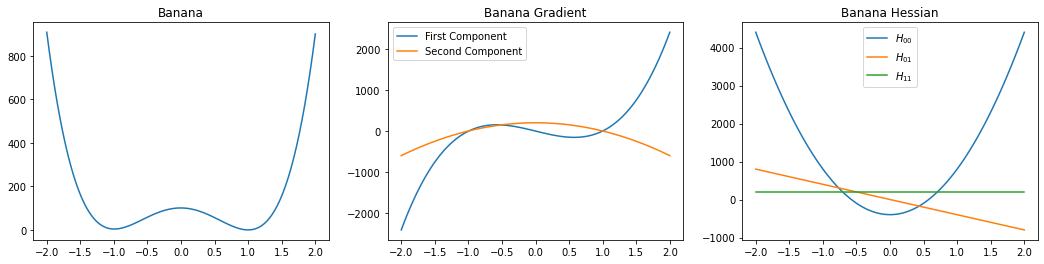

In [4]:
from autograd import jacobian
banana_gradient = grad(banana)
banana_hessian = jacobian(banana_gradient)
z0 = np.linspace(-2., 2., 101)
z1 = np.ones(101)
z = np.column_stack((z0,z1))
# bananaplot = [banana(z_s) for z_s in z]
# gradient = [banana_gradient(z_s) for z_s in z]
# hessian = [banana_hessian(z_s) for z_s in z]
plt.figure(figsize=(18, 4))
for k in [1,2,3]:
    pt = plt.subplot(1,3,k)
    if k == 1:
        pt.plot(z0, [banana(z_s) for z_s in z])
        pt.set_title("Banana")
    if k == 2:
        pt.plot(z0, [banana_gradient(z_s)[0] for z_s in z], label = 'First Component')
        pt.plot(z0, [banana_gradient(z_s)[1] for z_s in z], label = 'Second Component')
        pt.set_title("Banana Gradient")
        pt.legend()
    if k == 3:
        pt.plot(z0, [banana_hessian(z_s)[0][0] for z_s in z], label = '$H_{00}$')
        pt.plot(z0, [banana_hessian(z_s)[0][1] for z_s in z], label = '$H_{01}$')
        pt.plot(z0, [banana_hessian(z_s)[1][1] for z_s in z], label = '$H_{11}$')
        pt.set_title("Banana Hessian")
        pt.legend()
plt.show()

### Problem 3.2

In [5]:
z_s = np.array([0.,0.])
print(banana_gradient(z_s))
print(banana_hessian(z_s))

[-2.  0.]
[[  2.   0.]
 [  0. 200.]]


No, there is no stationary point at the origin of banana function, as the two components of the gradient function are not both 0.

As $H$ is symmetric and has positive eigenvalues of 2 and 200, it is positive semidefinite. Hence, the banana function is convex at the origin.

## Part 4: Gradient Descent

In [6]:
from scipy import optimize
from numpy import linalg as npl


def line_search(f, g, z0, f0, g0, state=None):
    outcome = optimize.line_search(f, g, z0, -g0, g0, f0)
    alpha, f1 = outcome[0], outcome[3]
    evaluations = outcome[1]
    if alpha is None:
        alpha, f1 = 0., f0
    z1 = z0 - g0 * alpha
    return z1, f1, evaluations, state

In [7]:
def gd(f, g, z0, step_function=line_search, state=None, max_evaluations=1000,
       min_step=1.e-8, min_gradient=1.e-6):
    evaluations, h = 0, []
    while True:
        f0, g0 = f(z0), g(z0)
        if not len(h):
            h.append((z0, f0))
        evaluations += 1
        if npl.norm(g0) < min_gradient:
            z1, f1 = z0, f0
            break
        z1, f1, n_eval, state = step_function(f, g, z0, f0, g0, state=state)
        evaluations += n_eval
        h.append((z1, f1))
        if npl.norm(z1 - z0) < min_step or evaluations > max_evaluations:
            break
        z0 = z1
    return z1, f1, evaluations, h

In [8]:
def momentum(f, g, z0, f0, g0, state=None):
    if state is None:
        state = {'alpha': 0.001, 'v0': 0., 'mu': 0.9}
    v1 = state['mu'] * state['v0'] - g0 * state['alpha']
    z1 = z0 + v1
    state['v0'] = v1
    return z1, f(z1), 1, state

for k in [1,2,3]:
    pt = plt.subplot(1,3,k)### Problem 4.1

In [9]:
def fixed(f, g,z0, f0, g0, state = None):
    if state is None:
        state = {'alpha':0.001, 'v0': 0., 'mu':0.}
    else:
        state['v0'] = 0.
        state['mu'] = 0.
    return momentum(f, g, z0, f0, g0, state)

In [10]:
z_0 = np.array((-1.2, 1.))
z_star = np.array([1., 1.])

In [11]:
steps = ((line_search, None), (fixed, {'alpha': 0.001}), (fixed, {'alpha': 0.005}),
         (momentum, {'alpha': 0.001, 'v0': 0., 'mu': 0.2}),
         (momentum, {'alpha': 0.001, 'v0': 0., 'mu': 0.5}),
         (momentum, {'alpha': 0.001, 'v0': 0., 'mu': 0.96}))

In [12]:
from numpy import array2string


def plot_contours(f, z_ast, rect):
    assert len(z_ast) == 2, 'can only plot in two dimensions'
    n = 101
    xs = np.linspace(rect[0], rect[1], n)
    ys = np.linspace(rect[2], rect[3], n)
    fs = np.array([[f(np.array([x, y])) for x in xs] for y in ys])
    plt.contour(xs, ys, fs, 20, colors='grey', linewidths=1)
    plt.plot(z_ast[0], z_ast[1], 'ro')
    plt.axis('scaled')


def fa(a, p=2):
    return array2string(np.array(a), precision=p, separator=', ')

In [13]:
def plot_history_path(h, f, z_ast, n_evals, state, rect=(-2., 2., -2., 2.)):
    assert len(z_ast) == 2, 'can only plot in two dimensions'
    plot_contours(f, z_ast, rect)
    plt.plot([p[0][0] for p in h], [p[0][1] for p in h])
    plt.plot(h[0][0][0], h[0][0][1], 'bo')
    z_last, f_last = h[-1][0], h[-1][1]
    ft = 'f({}) = {:.2g}; {} steps; {} evals'
    title = ft.format(fa(z_last), f_last, len(h), n_evals)
    if state is not None:
        s = state.copy()
        try:
            del s['v0']
        except KeyError:
            pass
        st = '; '.join(['{}={:.3g}'.format(name, value) for name, value in s.items()])
        title = '\n'.join((title, st))
    plt.title(title)

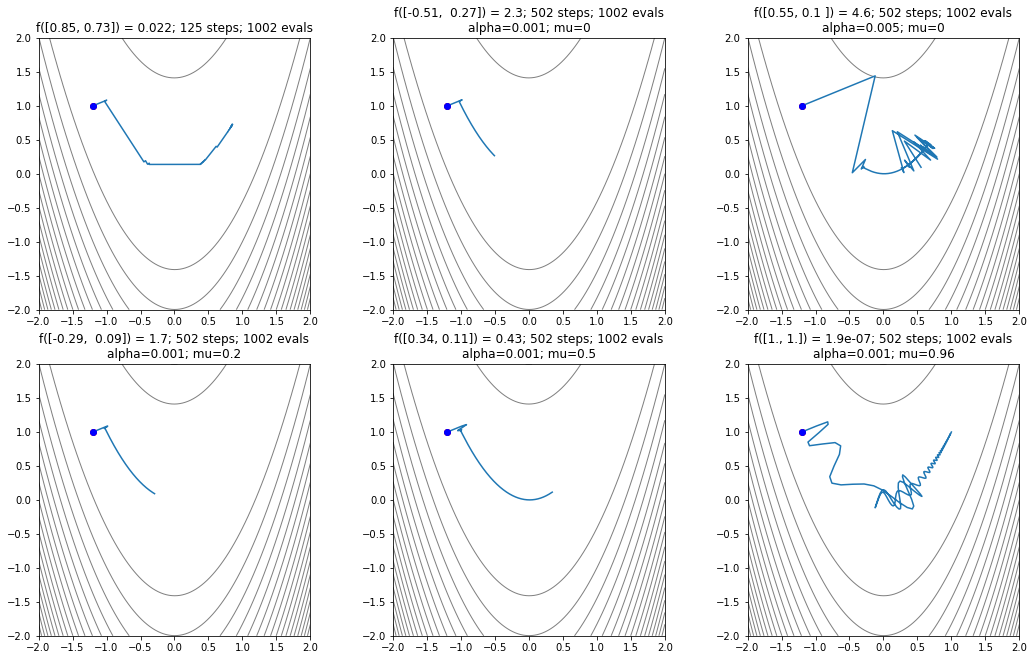

In [14]:
plt.figure(figsize=(18, 11))
for k in [1,2,3,4,5,6]:
    pt = plt.subplot(2,3,k)
    z1, f1, n_evals, h = gd(banana, banana_gradient, z_0, step_function = steps[k-1][0], state = steps[k-1][1])
    plot_history_path(h, banana, z_0, n_evals, steps[k-1][1])

### Problem 4.2 (Exam Style)

#### Line Search
Line search converges on a relatively accurate answer in the smallest number of steps. However, linear search is more computationally expensive than the other two methods as we need to compute $\alpha$ for every step.

#### Fixed Step
Fixed step searches requires the least effort to determine $\alpha$ as $\alpha$ is fixed. However, the choice of $\alpha$ heavily affects how well the we converge at the minimum. If $\alpha$ is very small, fixed step search can converge on the minimum reliably but it converges very slowly. If the choice of $\alpha$ is too big, then we can miss the minimum easily and get a very inaccurate answer.

#### Momentum
Momentum method has the highest accuracy among the three methods, but this also depends heavily on the selection of the momentum $\mu$. There is a sweet spot where $\mu$ is very close to 1 where the method is the most accurate, but this accuracy very quickly degenerates when $\mu$ gets too close to 1, upon which the method becomes very inaccurate as we may exceed the minimum point. If $\mu$ is small, then the method converges accurately to the correct answer, but it converges very slowly.